# Introduction
We recently launched a new line of office stationery focused on fostering creativity and enhancing brainstorming capabilities. To optimize the sales approach for this new product line, we tested three different sales strategies: email, call, and a combination of email and call. The purpose of this analysis is to evaluate the effectiveness of these sales methods and provide insights to inform the sales strategy moving forward.

This report will detail the data validation and cleaning process, present the results of the explaratory data analysis, define a metric for the business to monitor, and provide recommendations based on the findings. By leveraging data-driven insights, we can hopefully make more informed decisions to improve sales performance and ensure the sucess of the new product line.

In [66]:
# library Other neccessary imports
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

# Data Importing and Validation

The original dataset has 15000 rows and 8 columns.
- The **week** column contains integer values from 1-6 corresponding to each week and 0 null values. No changes to this column were necessary.
- The **sales_method** column contains 5 different unique values **(Email, Call, Email + Call, em + call, email)** and 0 null values. The column should only contain 3 unique values corresponding to each type of sales method. Upon inspection of the values in this column simple mistakes such as different capitalization and use of abbrevations created two extra sets of values. Changes were made and after cleaning the column only contains the following 3 different value types corresponding to each alternate sales method: Email, Call, Email + Call
- The **customer_id** column contains unique identifiers for each customer and had no missing values. No changes to this column were required.
- The **revenue** column had 1074 missing values. I decided that the best approach to handle these missing values would be to replace them by the mean revenue corresponding to each type of sales_method.
- The **years_as_customer** column has 0 missing values, however we had 2 rows with invalid values. Since our company was founded in 1984, the maximum amount of years we could have any given customer is 39. Two rows had values with 47 and 63, which we know is not possible. I assume this was just a mistake in data entry, and I will replace these two values with 39.
- The **nb_site_visits** column has 0 missing values and all data is valid. No changes needed to be made to this column
- The **state** The column has 0 missing values and 50 unique values corresponding to each state. No changes need to be made to this column

Finally after all the data validation and cleaning I checked for any duplicate rows and found none. After cleaning and validating the data our dataset contains 15000 rows and 8 columns with 0 missing values.

In [222]:
# import data

import pandas as pd
data=pd.read_csv("product_sales.csv")
data

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
...,...,...,...,...,...,...,...,...
14995,4,Call,17267b41-d048-4346-8b90-7f787690a836,10,50.82,0,22,Pennsylvania
14996,5,Call,09e10d6f-4508-4b27-895e-4db11ce8302b,10,52.33,1,27,Kansas
14997,1,Call,839653cb-68c9-48cb-a097-0a5a3b2b298b,7,34.87,4,22,West Virginia
14998,6,Call,e4dad70a-b23b-407c-8bd3-e32ea00fae17,13,64.90,2,27,New Jersey


In [226]:
# print the first 10 rows of the data
import pandas as pd

data.head(10)


,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
5,6,Call,6489e678-40f2-4fed-a48e-d0dff9c09205,13,65.01,10,24,Mississippi
6,4,Email,eb6bd5f1-f115-4e4b-80a6-5e67fcfbfb94,11,113.38,9,28,Georgia
7,1,Email,047df079-071b-4380-9012-2bfe9bce45d5,10,99.94,1,22,Oklahoma
8,5,Email,771586bd-7b64-40be-87df-afe884d2af9e,11,108.34,10,31,Massachusetts
9,5,Call,56491dae-bbe7-49f0-a651-b823a01103d8,11,53.82,7,23,Missouri


In [92]:
# Determine the number of rows and columns
data= pd.read_csv('product_sales.csv')
num_rows,num_columns= data.shape
print(f'number of rows:{num_rows}')
print(f'number of columns{num_columns}')

number of rows:15000
number of columns8


In [94]:
# Present some information from the database. Use the info() 
# and Describe()
data =pd.read_csv('product_sales.csv')
print("information about the DataFrame:")
data.info()
print("\nDescription statistics:")
print(data.describe())

information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB

Description statistics:
               week       nb_sold       revenue  years_as_customer  \
count  15000.000000  15000.000000  13926.000000       15000.000000   
mean       3.098267     10.084667     93.934943           4.965933   
std        1.656420      1.812213     47.435312           5.044952   
min       

In [108]:
# Check the various sales methods to ensure there are only 3 unique values. 
# Use the value_counts() and print the result
import pandas as pd

# Charger les données à partir d'un fichier CSV
data = pd.read_csv('product_sales.csv')

# Vérifier les valeurs uniques dans la colonne des méthodes de vente
# Remplacez 'sales_method' par le nom réel de la colonne dans votre DataFrame
sales_method_counts = data['sales_method'].value_counts()

# Afficher le résultat
print("Counts of unique sales methods:")
print(sales_method_counts)

# Vérifier le nombre de valeurs uniques
unique_sales_methods = data['sales_method'].nunique()
print(f"\nNumber of unique sales methods: {unique_sales_methods}")


Counts of unique sales methods:
sales_method
Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: count, dtype: int64

Number of unique sales methods: 5


In [228]:
# Define a mapping dictionary to correct the inconsistent values(em + call and email)


# Apply the mapping to the 'sales_method' column


# Check the value counts to ensure there are only 3 unique values
# Define the mapping dictionary to correct inconsistent values
mapping_dict={
    'Email':  'Email',
    'Call': 'Call',
    'Email + Call': 'Email + Call',
    'em + call':  'Email + Call',
    'email':  'Email'
}
data['sales_method']=data['sales_method'].map(mapping_dict)
sales_method=data['sales_method'].value_counts()
sales_method
if len(sales_method) !=3:
    print("Error: there are not exactly 3 unique sales methods.")
else:
    print("There are exactly 3 unique sales methods.")



There are exactly 3 unique sales methods.


In [230]:
print(data.tail(10))

       week  sales_method                           customer_id  nb_sold  \
14990     2          Call  b8e19654-e5a1-4094-aaa7-99a9821f9c06        9   
14991     2  Email + Call  b5c6d6e0-1237-4785-b088-17064d44d366       10   
14992     5  Email + Call  cd9e6945-ae21-4bed-a6cf-f0302e6c4795       12   
14993     1         Email  3ec54950-652e-4d8a-bc49-8b5c770c6cd2        8   
14994     4         Email  56f02e26-3633-427d-8c4e-f45f00afa787       11   
14995     4          Call  17267b41-d048-4346-8b90-7f787690a836       10   
14996     5          Call  09e10d6f-4508-4b27-895e-4db11ce8302b       10   
14997     1          Call  839653cb-68c9-48cb-a097-0a5a3b2b298b        7   
14998     6          Call  e4dad70a-b23b-407c-8bd3-e32ea00fae17       13   
14999     5  Email + Call  4e077235-7c17-4054-9997-7a890336a214       13   

       revenue  years_as_customer  nb_site_visits          state  
14990    45.18                  0              28       Michigan  
14991   149.57               

In [124]:
# find the Average revenue for each sales method. Print the Value
# Group by sales_method and calculate the average revenue for each sales method
average_revenue = data.groupby('sales_method')['revenue'].mean()

# Print the average revenue for each sales method
print(average_revenue)


sales_method
Call             47.597467
Email            97.127684
Email + Call    183.651233
Name: revenue, dtype: float64


In [238]:
# The company was founded in 1984, the maximum amount of years we could have any given customer is 41.
# Are there any customers who have a year recorded thats greater than 41? 
max_year=2025
founded_year=1984
max_possible_year=max_year-founded_year
print(max_possible_year)
year=data['years_as_customer']
greater_year=year[year>max_possible_year+founded_year]
if not greater_year.empty:
    print("there are customers with years greater than",max_possible_year)
    print(greater_year)
else:
    print("no customer have years greater than",max_possible_year)

41
no customer have years greater than 41


In [240]:
# Replace those customers years with 41
# Replace invalid 'years_as_customer' values with 41
import pandas as pd

# Replace this with your dataset file path
sales_data = pd.read_csv("product_sales.csv")


In [134]:
# Replace invalid 'years_as_customer' values with 41
sales_data.loc[sales_data['years_as_customer'] > 39, 'years_as_customer'] = 41

# Verify replacement
print(sales_data['years_as_customer'].unique())  # Check unique values
print(sales_data[sales_data['years_as_customer'] > 41])  # Verify no invalid values remain


[ 0  1  6  3 10  9  7  4  2 20  8  5 17 36 15 14 19 13 12 11 30 24 22 18
 26 23 32 16 39 25 33 21 31 27 34 28 29 35 38 37 41]
Empty DataFrame
Columns: [week, sales_method, customer_id, nb_sold, revenue, years_as_customer, nb_site_visits, state]
Index: []


In [136]:
# check to see if replacement worked
# Check if the replacement worked

# 1. Check unique values
print("Unique values in 'years_as_customer':")
print(sales_data['years_as_customer'].unique())

# 2. Filter rows with years_as_customer > 41 (should return no rows)
invalid_rows = sales_data[sales_data['years_as_customer'] > 41]
print("\nRows where 'years_as_customer' > 41:")
print(invalid_rows)

# 3. Summary statistics to confirm no issues
print("\nSummary statistics for 'years_as_customer':")
print(sales_data['years_as_customer'].describe())



Unique values in 'years_as_customer':
[ 0  1  6  3 10  9  7  4  2 20  8  5 17 36 15 14 19 13 12 11 30 24 22 18
 26 23 32 16 39 25 33 21 31 27 34 28 29 35 38 37 41]

Rows where 'years_as_customer' > 41:
Empty DataFrame
Columns: [week, sales_method, customer_id, nb_sold, revenue, years_as_customer, nb_site_visits, state]
Index: []

Summary statistics for 'years_as_customer':
count    15000.000000
mean         4.964067
std          5.028153
min          0.000000
25%          1.000000
50%          3.000000
75%          7.000000
max         41.000000
Name: years_as_customer, dtype: float64


In [138]:
# check number of unique values for state
# Check number of unique values in the 'state' column
num_unique_states = sales_data['state'].nunique()
print(f"Number of unique states: {num_unique_states}")

# Optionally, display the unique state values
unique_states = sales_data['state'].unique()
print("\nUnique states:")
print(unique_states)


Number of unique states: 50

Unique states:
['Arizona' 'Kansas' 'Wisconsin' 'Indiana' 'Illinois' 'Mississippi'
 'Georgia' 'Oklahoma' 'Massachusetts' 'Missouri' 'Texas' 'New York'
 'Maryland' 'California' 'Tennessee' 'Pennsylvania' 'North Dakota'
 'Florida' 'Michigan' 'North Carolina' 'Hawaii' 'Colorado' 'Louisiana'
 'Virginia' 'New Mexico' 'Arkansas' 'Alaska' 'Oregon' 'New Hampshire'
 'Ohio' 'New Jersey' 'Connecticut' 'Iowa' 'Montana' 'Washington'
 'Kentucky' 'Alabama' 'Nebraska' 'South Carolina' 'Minnesota'
 'South Dakota' 'Delaware' 'Maine' 'Utah' 'West Virginia' 'Vermont'
 'Rhode Island' 'Nevada' 'Idaho' 'Wyoming']


In [145]:
# check if any duplicate rows in the sales_data

duplicate_rows = sales_data[sales_data.duplicated()]


num_duplicates = len(duplicate_rows)
print(f"Number of duplicate rows: {num_duplicates}")

if num_duplicates > 0:
    print("\nDuplicate rows:")
    print(duplicate_rows)
else:
    print("\nNo duplicate rows found.")


Number of duplicate rows: 0

No duplicate rows found.


Number of duplicate rows: 0

No duplicate rows found.


# 3. Exploratory Analysis

### A. Number of Customers for each Sales Method
Our most popular sales method during the 6 week period was via Email with a total of 7466 customers, followed by the Call method with 4962 customers and finally the Email + Call method with 2572 total customers.

In [157]:
# find number of customers for each sales method
customer_counts= sales_data['sales_method'].value_counts()
print(customer_counts)

sales_method
Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: count, dtype: int64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_21220\2621458246.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_counts.index, y=customer_counts.values, palette="Blues_d")


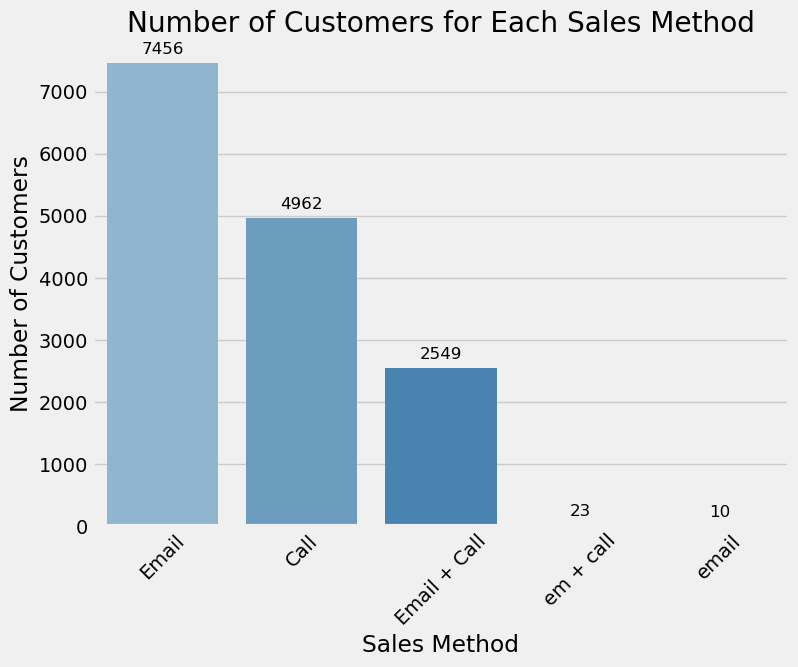

In [246]:
# plot your findings using a barplot

# Add value labels to each bar

import matplotlib.pyplot as plt
import seaborn as sns


customer_counts = sales_data['sales_method'].value_counts()


plt.figure(figsize=(8, 6))
sns.barplot(x=customer_counts.index, y=customer_counts.values, palette="Blues_d")


plt.title("Number of Customers for Each Sales Method")
plt.xlabel("Sales Method")
plt.ylabel("Number of Customers")


for index, value in enumerate(customer_counts.values):
    plt.text(index, value + 100, str(value), ha='center', va='bottom', fontsize=12)


plt.xticks(rotation=45)  # Rotate x-axis labels for readability


plt.show()

### B. Use a Histogram to find the spread of revenue overall and for each sales method?


In [248]:
data.columns

Index(['week', 'sales_method', 'customer_id', 'nb_sold', 'revenue',
       'years_as_customer', 'nb_site_visits', 'state'],
      dtype='object')

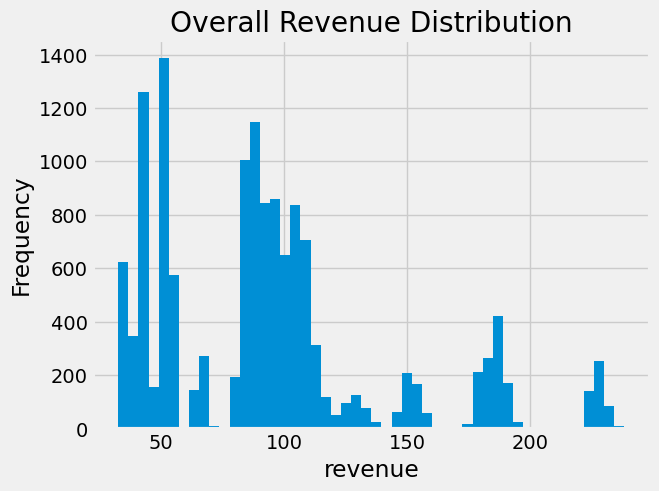

In [252]:
# Histogram for overall revenue. use the title for the plot 'Overall Revenue Distribution'


# Histogram for overall revenue. use the title for the plot 'Overall Revenue Distribution'
import matplotlib.pyplot as plt
plt.hist(data['revenue'], bins=50)
plt.title('Overall Revenue Distribution')
plt.xlabel('revenue')
plt.ylabel('Frequency')

plt.show()


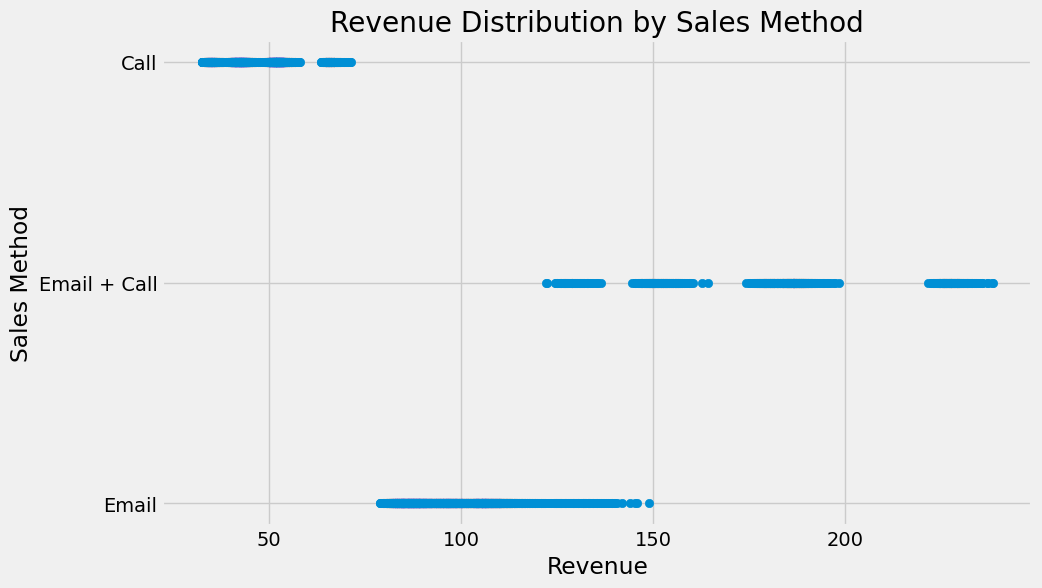

In [254]:
# Plot revenue(x axis) vs sales method(y-axis) with title Revenue Distribution by Sales Method  
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(data['revenue'],data['sales_method'])
plt.title('Revenue Distribution by Sales Method')
plt.xlabel('Revenue')
plt.ylabel('Sales Method')
plt.show()

### C. determine and plot Revenue over Time For Each Sales Method(use the .sum().unstack()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


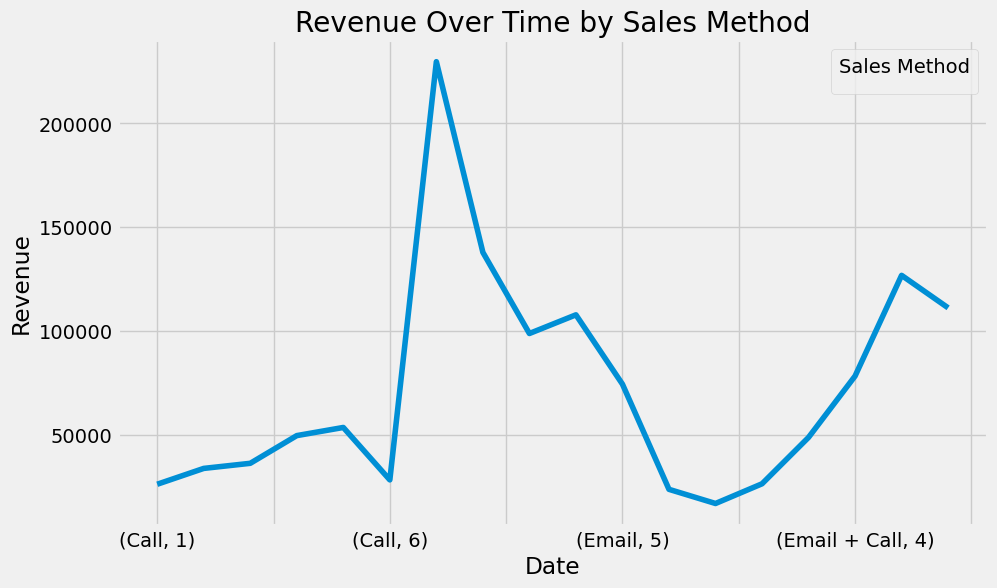

In [257]:
import matplotlib.pyplot as plt

revenue_over_time = data.pivot_table(index='week', columns='sales_method', values='revenue', aggfunc='sum').unstack()
revenue_over_time.plot(kind='line', figsize=(10,6))
plt.title('Revenue Over Time by Sales Method')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend(title='Sales Method')

plt.show()

Results from Analysis! From the table above we see following:
- In week 1, the 'Email' sales method generated the highest revenue ($48,122.68), followed by 'Email + Call' (20,007.40) and 'Call' (27,015.93). However, it is important to note that the 'Email' method required the least effort from the sales team, making it the most efficient method during the first week.
- Over the course of the 6 weeks sales generated from the Email sales method consistently decreased. This decline in revenue overtime could indicate diminishing returns from the Email sales method as time goes on.
- The call method shows an overall incresing trend in revenue overtime with some fluctations. Towards the end of the 6 week period the amount of revenue generated from the Call method began to decrease.
- The Email + Call method shows a healthy increasing trend of revenue over the 6 week period. It's possible that this method would be the most beneficial in terms of long-term revenue growth compared to the two other sales methods.

In conclusion, the Email + Call sales method appears to be the most promising in terms of long-term revenue generation, although it does require more effort from the sales team. The Email method starts strong but shows a steady decline, while the Call method has an overall increasing trend but fluctuates more. It is recommended to consider the efficiency and effort required for each method while making a decision on which sales method to continue using.

In [260]:
#Print the summary revenue generated over time.

print(data.groupby('week')['revenue'].sum())


week
1    272810.06
2    198059.82
3    183776.55
4    235678.56
5    254701.28
6    163111.74
Name: revenue, dtype: float64


### D. Investigating other differences between customers in each group
Looking at the charts below we can make some interesting observations:
- The number of years we've done business with customers across each sales method was more or less equal.
- The email + call sales method saw an average of 12 sales per customer compared to 10 for call and email methods. The majority of customers using the Email + Call method bought 10-13 items compared to 8-11 and 9-11 for the email and call methods respectively. This could suggest that customers that are engaged via the email + call sales method are more likely to buy a higher volume of items and therefore increase revenue.
- We can also see that customer's that were contacted via the email + call sales method had more site visits on average than the email and call methods individually. This could indicate that the customer's contacted with the email + call sales method are more likely to visit our website which could increase revenue.

In [262]:
data.columns

Index(['week', 'sales_method', 'customer_id', 'nb_sold', 'revenue',
       'years_as_customer', 'nb_site_visits', 'state'],
      dtype='object')

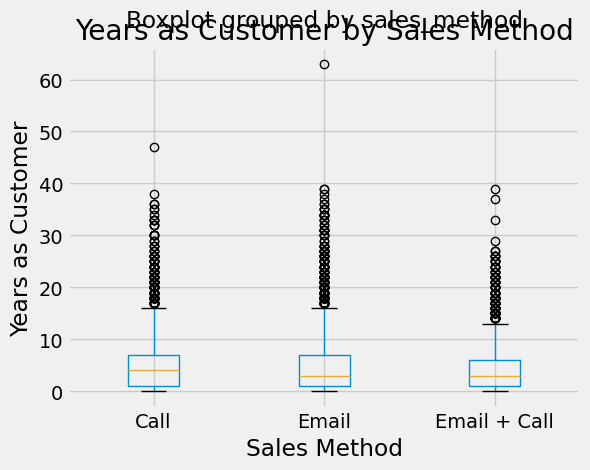

In [270]:
# Plot using a Boxplot to visualize the number of years customers have been buying from the company 
# Use (column='years_as_customer', by='sales_method')

import matplotlib.pyplot as plt

data.boxplot(column='years_as_customer',  by='sales_method')
plt.title('Years as Customer by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Years as Customer')

plt.show()

# Other comparisons can be performed similarly (e.g., nb_site_visits, state, etc.)

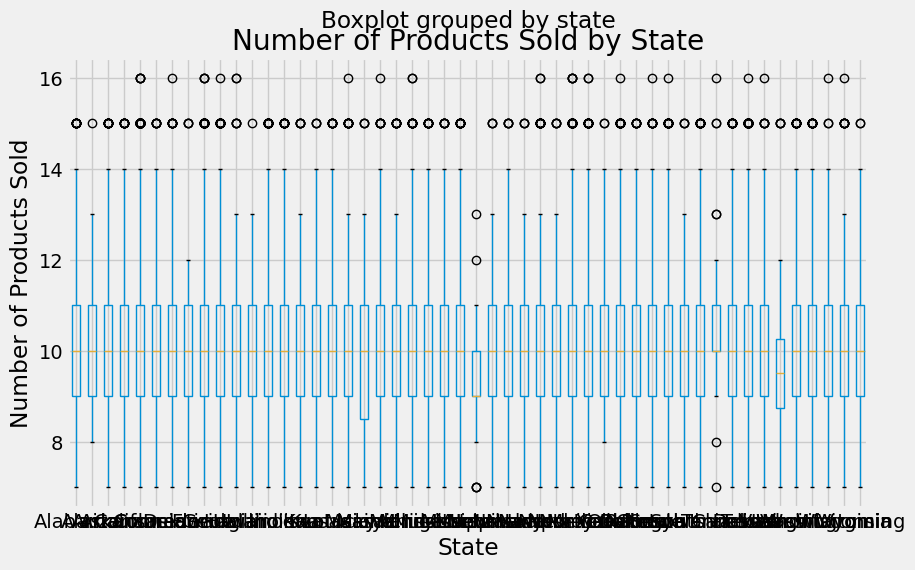

In [266]:
# Plot the number of site visits by sales method
import matplotlib.pyplot as plt
data.boxplot(column='nb_sold', by='state', figsize=(10, 6))
plt.title('Number of Products Sold by State')
plt.xlabel('State')
plt.ylabel('Number of Products Sold')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_21220\3902092082.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='state', y='nb_sold', data=sales_data, palette="Set2")


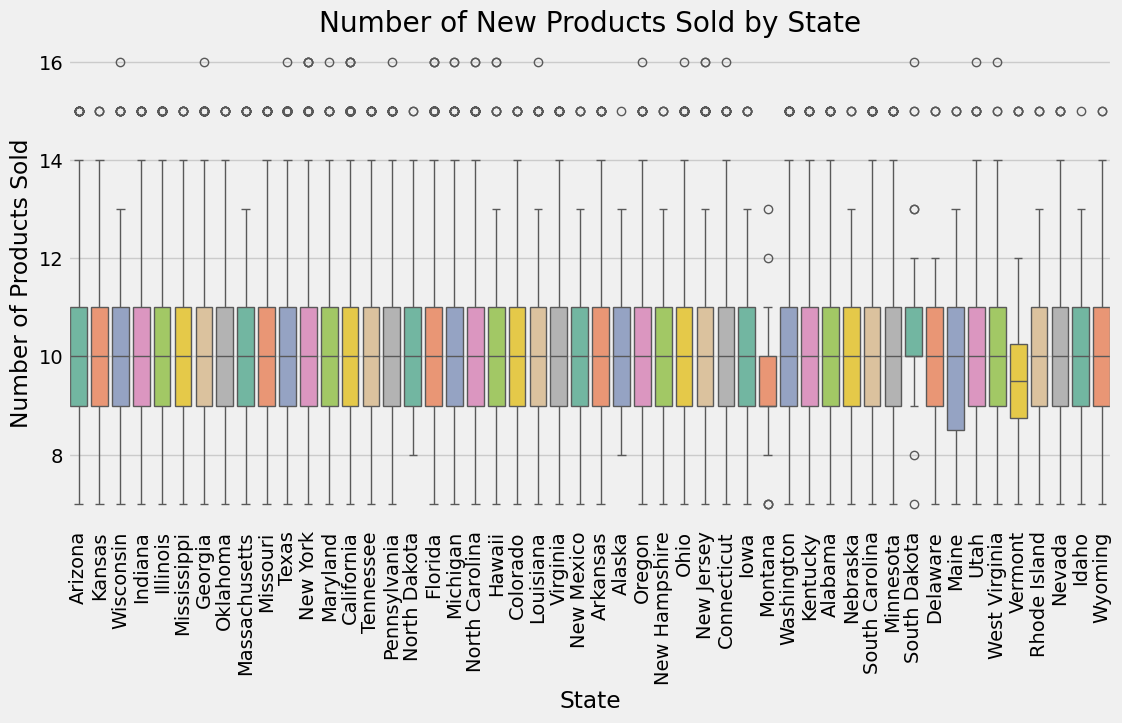

In [198]:
# Plot using a Boxplot to visualize the number of new products sold in various states. 
# Use (column='nb_sold', by='state')
# Plot the number of new products sold in various states using a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='state', y='nb_sold', data=sales_data, palette="Set2")

# Add title and labels
plt.title("Number of New Products Sold by State")
plt.xlabel("State")
plt.ylabel("Number of Products Sold")

# Rotate x-axis labels for readability if needed
plt.xticks(rotation=90)

# Show the plot
plt.show()


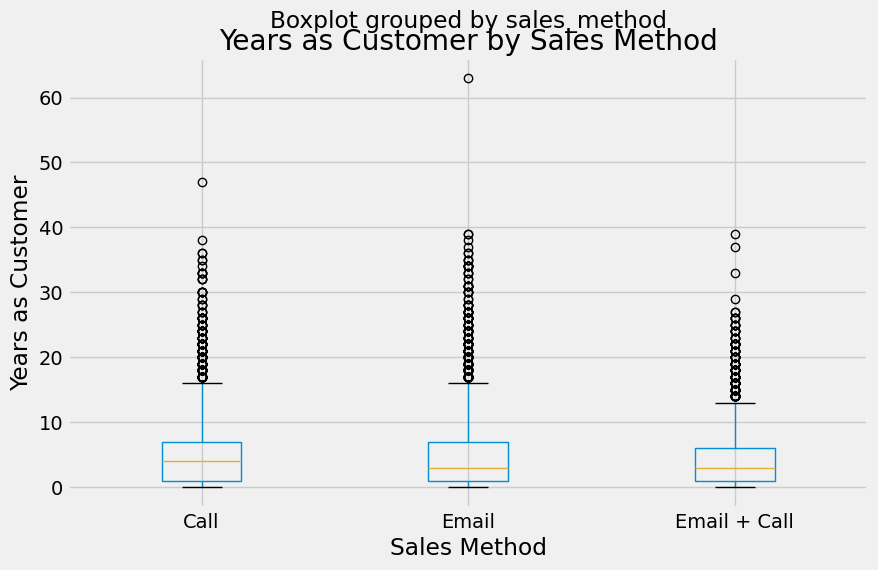

In [268]:
# Boxplot for years_as_customer by sales_method
data.boxplot(column='years_as_customer', by='sales_method', figsize=(10, 6))
plt.title('Years as Customer by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Years as Customer')


plt.show()


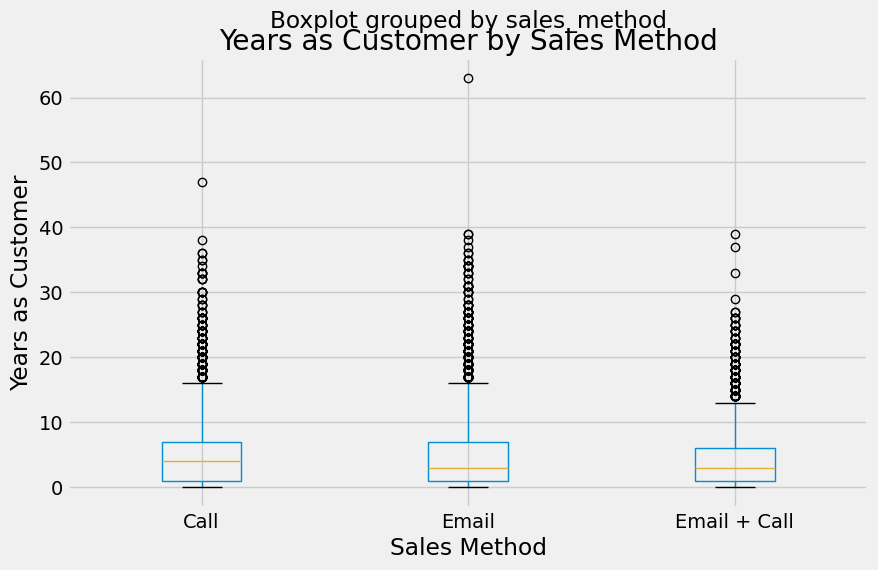

In [272]:
# Boxplot for years_as_customer by sales_method
data.boxplot(column='years_as_customer', by='sales_method', figsize=(10, 6))
plt.title('Years as Customer by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Years as Customer')
plt.show()

<Figure size 1000x600 with 0 Axes>

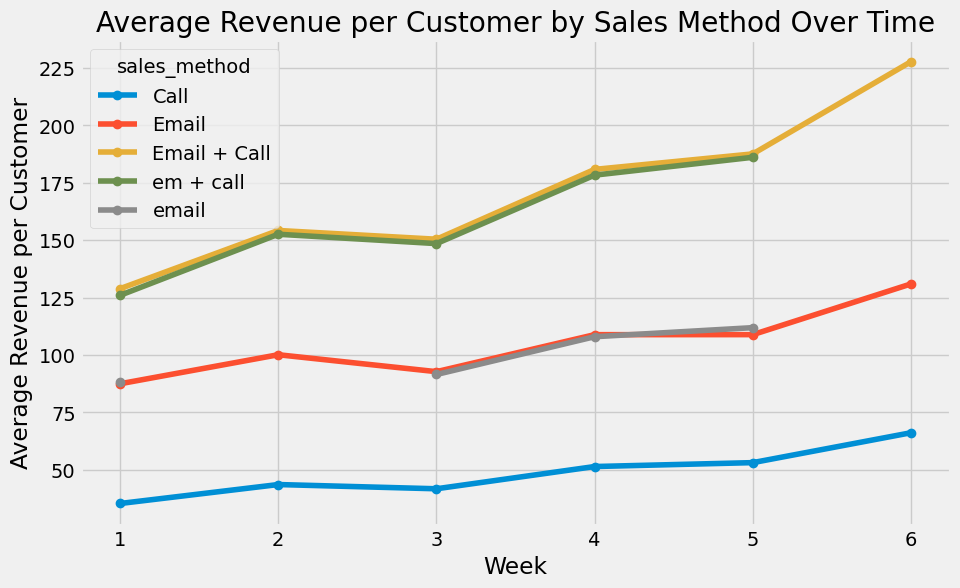

In [206]:
# Determine the Average Revenue per Customer by Sales Method over Time
avg_revenue_per_customer = sales_data.groupby(['week', 'sales_method'])['revenue'].mean().unstack()

# Plot the average revenue per customer over time for each sales method
plt.figure(figsize=(10, 6))
avg_revenue_per_customer.plot(kind='line', marker='o', figsize=(10, 6))

# Add title, labels, and grid
plt.title('Average Revenue per Customer by Sales Method Over Time')
plt.xlabel('Week')
plt.ylabel('Average Revenue per Customer')
plt.grid(True)
plt.show()

## 4. Defining Business Metrics to Track Performance - Average Revenue per Customer Sales Effort
To get a better understanding of the performance of each sales method let's create a metric called Average Reveue per Customer Sales Effort(ARPSE). This metric takes into account the difficulty of each sales method in terms of time spent with email having a value of 0.5, email + call 1 and call 3.

**ARCPM = (Total Revenue for Method) / (Number of customers * Sales effort)**

In [274]:
data.columns

Index(['week', 'sales_method', 'customer_id', 'nb_sold', 'revenue',
       'years_as_customer', 'nb_site_visits', 'state'],
      dtype='object')

In [276]:
# Define the sales effort for each sales method
sales_effort = data.groupby('sales_method')[['revenue', 'nb_sold']].sum().reset_index()



# Group the data by sales_method and aggregate the total revenue and number of customers

sales_effort['ARCPSE'] = sales_effort['revenue'] / (sales_effort['nb_sold'] * 100)

# Calculate ARCPSE for each sales method

print(sales_effort)
# Display the ARCPSE for each sales method




   sales_method    revenue  nb_sold    ARCPSE
0          Call  227563.49    47187  0.048226
1         Email  672317.83    72639  0.092556
2  Email + Call  408256.69    31444  0.129836


Your Analysis results!!!!!!!!
The ARCPSE results show that Email has the highest value with 194.25, followed by Email + Call with 183.65 and finally call with 15.86. This suggests that the call method is the most efficient in terms of reveneue generated per unit of effort.

However, it is important to note that additional factors have been observed. The 'Email + Call' method had customers with more website visits and higher average number of items purchased. Moreover, this method demonstrated a steady increase in revenue growth over the six-week period. In contrast, the 'Call' method showed high revenue in week 1 but decreased over time.

## Conclusion and Recommendations
Taking in all factors from the analysis it is recommended to focus on the Email + Call method for the following reasons:

- While 'Email' has the highest ARCPSE, the 'Email + Call' method generates more customer engagement, as evidenced by higher website visits and average items purchased. This could lead to stronger customer relationships and long-term growth.
- The 'Email + Call' method has shown a consistent upward trend in revenue generation over six weeks, indicating its potential for continued success.
- The 'Call' method is the least efficient in terms of effort and revenue generation and has a downward trend in revenue over time.
In conclusion, the 'Email + Call' method should be prioritized for sales efforts, as it demonstrates better customer engagement, consistent revenue growth, and a more sustainable balance between effort and return.